# EDA

In [1]:
import pandas as pd

In [2]:
pd.read_csv('clients2.csv')

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
2,00010925a5,NaN,2018-07-24 16:21:29,2018-09-14 16:12:49,83,U
3,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33,F
4,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73,U
...,...,...,...,...,...,...
200034,fffe0abb97,NaN,2017-11-27 08:56:54,2018-02-11 09:26:08,35,F
200035,fffe0ed719,NaN,2017-09-15 08:53:24,2017-12-12 14:50:12,69,U
200036,fffea1204c,NaN,2018-01-31 16:59:37,2018-03-12 17:02:27,73,F
200037,fffeca6d22,NaN,2017-12-28 11:56:13,NaN,77,F


In [3]:
clients = pd.read_csv('clients2.csv',
                     index_col='client_id',
                     parse_dates=['first_issue_date', 'first_redeem_date'],
                     na_values={'gender': 'U'})\
    .drop(columns='client_id.1')
clients

,first_issue_date,first_redeem_date,age,gender
client_id,,,,
000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,NaN
000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
00010925a5,2018-07-24 16:21:29,2018-09-14 16:12:49,83,NaN
0001f552b0,2017-06-30 19:20:38,2018-08-28 12:59:45,33,F
00020e7b18,2017-11-27 11:41:45,2018-01-10 17:50:05,73,NaN
...,...,...,...,...
fffe0abb97,2017-11-27 08:56:54,2018-02-11 09:26:08,35,F
fffe0ed719,2017-09-15 08:53:24,2017-12-12 14:50:12,69,NaN
fffea1204c,2018-01-31 16:59:37,2018-03-12 17:02:27,73,F


In [22]:
clients.describe()

,age,gender_F,gender_M
count,200039.000000,200039.000000,200039.000000
mean,46.417329,0.368408,0.167522
std,49.532475,0.482374,0.373442
min,-7491.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000
75%,59.000000,1.000000,0.000000
max,1852.000000,1.000000,1.000000


In [24]:
clients.isna().sum()

first_issue_date         0
first_redeem_date    17546
age                      0
gender               92832
dtype: int64

# Age

There are negative values and values above 100 (as high as 1852)

In [9]:
clients.loc[clients.age < 10, 'age'].describe()

count     183.000000
mean     -490.945355
std      1317.565874
min     -7491.000000
25%      -931.000000
50%         1.000000
75%         6.000000
max         9.000000
Name: age, dtype: float64

<AxesSubplot: ylabel='Frequency'>

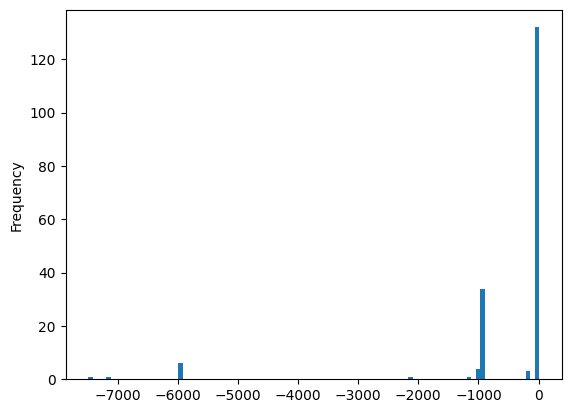

In [12]:
clients.loc[clients.age < 10, 'age'].plot.hist(bins=100)

In [14]:
clients.loc[clients.age > 100, 'age'].describe()

count     521.000000
mean      245.499040
std       312.991989
min       102.000000
25%       115.000000
50%       119.000000
75%       119.000000
max      1852.000000
Name: age, dtype: float64

<AxesSubplot: ylabel='Frequency'>

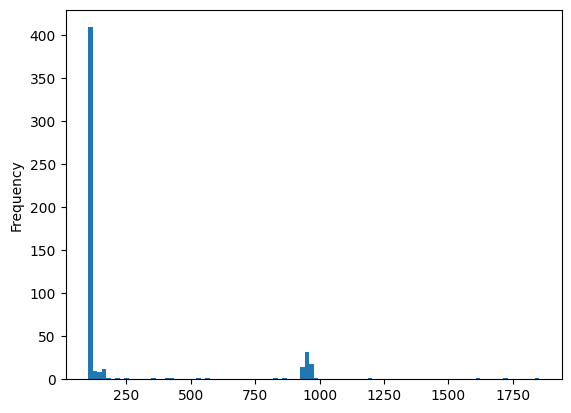

In [15]:
clients.loc[clients.age > 100, 'age'].plot.hist(bins=100)

In [19]:
clients.loc[(clients.age < 100) & (clients.age > 10), 'age'].describe()

count    199305.000000
mean         46.394892
std          15.896200
min          11.000000
25%          34.000000
50%          45.000000
75%          59.000000
max          98.000000
Name: age, dtype: float64

<AxesSubplot: ylabel='Density'>

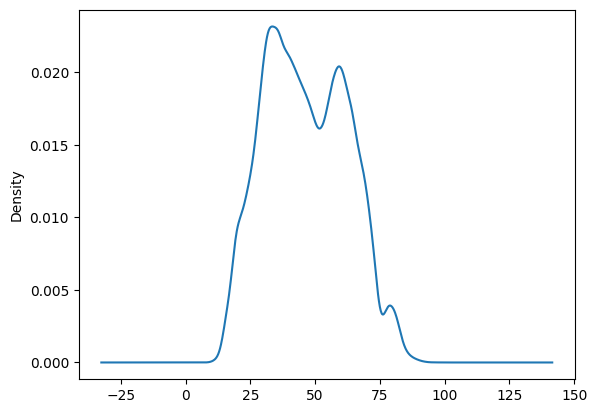

In [21]:
clients.loc[(clients.age < 100) & (clients.age > 10), 'age'].plot.kde()

I will replace unrealistic values with mean age

# Issue and redeem dates

In [22]:
last_redeem = clients.first_redeem_date.max(); last_redeem

Timestamp('2019-11-20 01:14:10')

In [23]:
clients\
.loc[clients.first_redeem_date - clients.first_issue_date <  pd.Timedelta(0),:]

,first_issue_date,first_redeem_date,age,gender
client_id,,,,
01440dcc9f,2018-11-09 13:50:09,2018-09-27 17:35:20,37,NaN
0251efe59c,2018-12-30 13:03:21,2018-12-30 13:03:12,32,NaN
0386091bd8,2019-01-17 15:20:56,2019-01-17 15:20:48,53,NaN
0515105ce0,2018-11-18 12:52:54,2018-11-18 12:52:50,29,M
05316e72fc,2018-12-20 14:00:54,2018-12-20 14:00:51,30,NaN
...,...,...,...,...
fd882468e2,2019-02-22 14:34:47,2019-02-22 14:34:22,31,M
fdaca167a3,2018-11-13 18:59:39,2018-11-13 18:59:15,19,NaN
fe3fe7ff63,2018-08-20 20:28:58,2018-08-20 20:28:56,65,M


In some cases (~0.1%), the first redeem is earlier than the first issue date.

In [3]:
pd.read_csv('train.csv')

,client_id,treatment_flg,purchased
0,ad6561e2d8,1,1
1,7c1ccbf93f,1,1
2,b58fadcab6,1,1
3,e99e6fabb9,0,0
4,27fb6f8520,1,1
...,...,...,...
140022,999d284453,1,1
140023,f634deea4e,0,1
140024,16cb4f99b0,0,1
140025,23c2b72b2e,1,1
